In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from xgboost import XGBRegressor

In [2]:
df = pd.read_csv("data/survey_results_public.csv").set_index("ResponseId")

In [3]:
pd.set_option('display.max_rows', None)
df.head()

,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,API document(s) and/or SDK document(s);User gu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Data columns (total 113 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    MainBranch                      object 
 1    Age                             object 
 2    Employment                      object 
 3    RemoteWork                      object 
 4    Check                           object 
 5    CodingActivities                object 
 6    EdLevel                         object 
 7    LearnCode                       object 
 8    LearnCodeOnline                 object 
 9    TechDoc                         object 
 10   YearsCode                       object 
 11   YearsCodePro                    object 
 12   DevType                         object 
 13   OrgSize                         object 
 14   PurchaseInfluence               object 
 15   BuyNewTool                      object 
 16   BuildvsBuy                      object 
 17   TechEndorse    

In [5]:
df_hc = df.nunique().sort_values(ascending=False)

In [6]:
cols = df_hc[df_hc > 100].index.tolist()
cols

['LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'LanguageAdmired',
 'WebframeHaveWorkedWith',
 'ToolsTechAdmired',
 'WebframeWantToWorkWith',
 'LearnCodeOnline',
 'MiscTechWantToWorkWith',
 'NEWCollabToolsWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'NEWCollabToolsAdmired',
 'ConvertedCompYearly',
 'OfficeStackAsyncHaveWorkedWith',
 'PlatformHaveWorkedWith',
 'WebframeAdmired',
 'OfficeStackSyncHaveWorkedWith',
 'MiscTechAdmired',
 'PlatformWantToWorkWith',
 'DatabaseAdmired',
 'OfficeStackAsyncWantToWorkWith',
 'CompTotal',
 'OfficeStackSyncWantToWorkWith',
 'AISearchDevHaveWorkedWith',
 'OfficeStackAsyncAdmired',
 'PlatformAdmired',
 'OfficeStackSyncAdmired',
 'OpSysPersonal use',
 'AISearchDevWantToWorkWith',
 'OpSysProfessional use',
 'AIToolInterested in Using',
 'EmbeddedHaveWorkedWith',
 'AIToolNot interested in Using',
 'AISearchD

In [7]:
cols.remove("Country")
cols.remove("Employment")
cols.remove("ConvertedCompYearly")

In [8]:
cols

['LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'NEWCollabToolsHaveWorkedWith',
 'LanguageAdmired',
 'WebframeHaveWorkedWith',
 'ToolsTechAdmired',
 'WebframeWantToWorkWith',
 'LearnCodeOnline',
 'MiscTechWantToWorkWith',
 'NEWCollabToolsWantToWorkWith',
 'MiscTechHaveWorkedWith',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OfficeStackAsyncHaveWorkedWith',
 'PlatformHaveWorkedWith',
 'WebframeAdmired',
 'OfficeStackSyncHaveWorkedWith',
 'MiscTechAdmired',
 'PlatformWantToWorkWith',
 'DatabaseAdmired',
 'OfficeStackAsyncWantToWorkWith',
 'CompTotal',
 'OfficeStackSyncWantToWorkWith',
 'AISearchDevHaveWorkedWith',
 'OfficeStackAsyncAdmired',
 'PlatformAdmired',
 'OfficeStackSyncAdmired',
 'OpSysPersonal use',
 'AISearchDevWantToWorkWith',
 'OpSysProfessional use',
 'AIToolInterested in Using',
 'EmbeddedHaveWorkedWith',
 'AIToolNot interested in Using',
 'AISearchDevAdmired',
 'EmbeddedWa

In [9]:
len(cols)

57

In [10]:
df.drop(columns=cols, inplace=True)

In [11]:
df.head()

,MainBranch,Age,Employment,RemoteWork,Check,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Primary/elementary school,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,"Developer, full-stack",NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",37,27,Developer Experience,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,Some college/university study without earning ...,4,NaN,"Developer, full-stack",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,"Secondary school (e.g. American high school, G...",9,NaN,"Developer, full-stack",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MainBranch            65437 non-null  object 
 1   Age                   65437 non-null  object 
 2   Employment            65437 non-null  object 
 3   RemoteWork            54806 non-null  object 
 4   Check                 65437 non-null  object 
 5   EdLevel               60784 non-null  object 
 6   YearsCode             59869 non-null  object 
 7   YearsCodePro          51610 non-null  object 
 8   DevType               59445 non-null  object 
 9   OrgSize               47480 non-null  object 
 10  PurchaseInfluence     47406 non-null  object 
 11  BuildvsBuy            43358 non-null  object 
 12  Country               58930 non-null  object 
 13  NEWSOSites            60286 non-null  object 
 14  SOVisitFreq           59536 non-null  object 
 15  SOAccount             59

In [13]:
df_null = df.isnull().sum().sort_values(ascending=False)

In [14]:
drop_cols = df_null[df_null > (len(df.index)/2)].index.tolist()
drop_cols.remove("ConvertedCompYearly")
drop_cols

['Knowledge_9',
 'Frequency_3',
 'Knowledge_8',
 'Knowledge_7',
 'Knowledge_6',
 'Knowledge_5',
 'Knowledge_2',
 'Knowledge_4',
 'Knowledge_3',
 'Frequency_2',
 'Frequency_1',
 'ProfessionalCloud',
 'Knowledge_1',
 'ProfessionalQuestion',
 'TimeAnswering',
 'Industry',
 'TimeSearching',
 'JobSat',
 'JobSatPoints_1',
 'JobSatPoints_4',
 'JobSatPoints_5',
 'JobSatPoints_11',
 'JobSatPoints_7',
 'JobSatPoints_6',
 'JobSatPoints_10',
 'JobSatPoints_8',
 'JobSatPoints_9',
 'WorkExp',
 'ICorPM']

In [15]:
df.drop(columns=drop_cols, inplace=True)

In [16]:
df.head()

,MainBranch,Age,Employment,RemoteWork,Check,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,...,SOComm,AISelect,AISent,AIAcc,AIComplex,AIThreat,TBranch,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,
1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Primary/elementary school,NaN,NaN,NaN,NaN,...,NaN,Yes,Very favorable,NaN,NaN,NaN,No,NaN,NaN,NaN
2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,"Developer, full-stack",NaN,...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN
3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",37,27,Developer Experience,NaN,...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,No,Appropriate in length,Easy,NaN
4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,Some college/university study without earning ...,4,NaN,"Developer, full-stack",NaN,...,"No, not really",Yes,Very favorable,Somewhat trust,Bad at handling complex tasks,No,NaN,Too long,Easy,NaN
5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,"Secondary school (e.g. American high school, G...",9,NaN,"Developer, full-stack",NaN,...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65437 entries, 1 to 65437
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   MainBranch           65437 non-null  object 
 1   Age                  65437 non-null  object 
 2   Employment           65437 non-null  object 
 3   RemoteWork           54806 non-null  object 
 4   Check                65437 non-null  object 
 5   EdLevel              60784 non-null  object 
 6   YearsCode            59869 non-null  object 
 7   YearsCodePro         51610 non-null  object 
 8   DevType              59445 non-null  object 
 9   OrgSize              47480 non-null  object 
 10  PurchaseInfluence    47406 non-null  object 
 11  BuildvsBuy           43358 non-null  object 
 12  Country              58930 non-null  object 
 13  NEWSOSites           60286 non-null  object 
 14  SOVisitFreq          59536 non-null  object 
 15  SOAccount            59560 non-null  obje

In [18]:
unness_cols = ["Check", "DevType", "PurchaseInfluence", "BuildvsBuy", "NEWSOSites", "SOVisitFreq", "SOAccount", "SOPartFreq",           
"SOComm", "AISelect", "AISent", "AIAcc", "AIComplex", "AIThreat", "TBranch", "SurveyLength", "SurveyEase", "MainBranch"]

In [19]:
df.drop(columns=unness_cols, inplace=True)

In [20]:
df.head()

,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,OrgSize,Country,ConvertedCompYearly
ResponseId,,,,,,,,,
1,Under 18 years old,"Employed, full-time",Remote,Primary/elementary school,NaN,NaN,NaN,United States of America,NaN
2,35-44 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,17,NaN,United Kingdom of Great Britain and Northern I...,NaN
3,45-54 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",37,27,NaN,United Kingdom of Great Britain and Northern I...,NaN
4,18-24 years old,"Student, full-time",NaN,Some college/university study without earning ...,4,NaN,NaN,Canada,NaN
5,18-24 years old,"Student, full-time",NaN,"Secondary school (e.g. American high school, G...",9,NaN,NaN,Norway,NaN


In [21]:
df = df[df["ConvertedCompYearly"].notnull()]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 73 to 41188
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  23435 non-null  object 
 1   Employment           23435 non-null  object 
 2   RemoteWork           23427 non-null  object 
 3   EdLevel              23435 non-null  object 
 4   YearsCode            23388 non-null  object 
 5   YearsCodePro         23345 non-null  object 
 6   OrgSize              23410 non-null  object 
 7   Country              23435 non-null  object 
 8   ConvertedCompYearly  23435 non-null  float64
dtypes: float64(1), object(8)
memory usage: 1.8+ MB


In [23]:
df.isnull().sum().sort_values(ascending=False)

YearsCodePro           90
YearsCode              47
OrgSize                25
RemoteWork              8
Age                     0
Employment              0
EdLevel                 0
Country                 0
ConvertedCompYearly     0
dtype: int64

In [24]:
df["YearsCodePro"].replace({"Less than 1 year":0.5, "More than 50 years":50}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15728\3472702861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCodePro"].replace({"Less than 1 year":0.5, "More than 50 years":50}, inplace=True)


In [25]:
df["YearsCode"].replace({"Less than 1 year":0.5, "More than 50 years":50}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_15728\1028780232.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["YearsCode"].replace({"Less than 1 year":0.5, "More than 50 years":50}, inplace=True)


In [26]:
df[["YearsCode", "YearsCodePro"]] = df[["YearsCode", "YearsCodePro"]].fillna(df[["YearsCode", "YearsCodePro"]].median())

In [27]:
df[["YearsCode", "YearsCodePro"]] = df[["YearsCode", "YearsCodePro"]].astype(float)

In [28]:
df.isnull().sum().sort_values(ascending=False)

OrgSize                25
RemoteWork              8
Age                     0
Employment              0
EdLevel                 0
YearsCode               0
YearsCodePro            0
Country                 0
ConvertedCompYearly     0
dtype: int64

In [29]:
df[["OrgSize", "RemoteWork"]] = df[["OrgSize", "RemoteWork"]].fillna(df[["OrgSize", "RemoteWork"]].mode().iloc[0])

In [30]:
df.isnull().sum().sort_values(ascending=False)

Age                    0
Employment             0
RemoteWork             0
EdLevel                0
YearsCode              0
YearsCodePro           0
OrgSize                0
Country                0
ConvertedCompYearly    0
dtype: int64

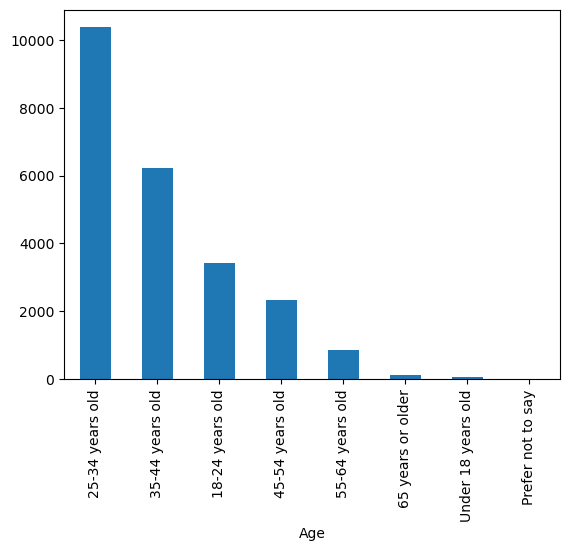

In [31]:
df["Age"].value_counts().plot(kind="bar");

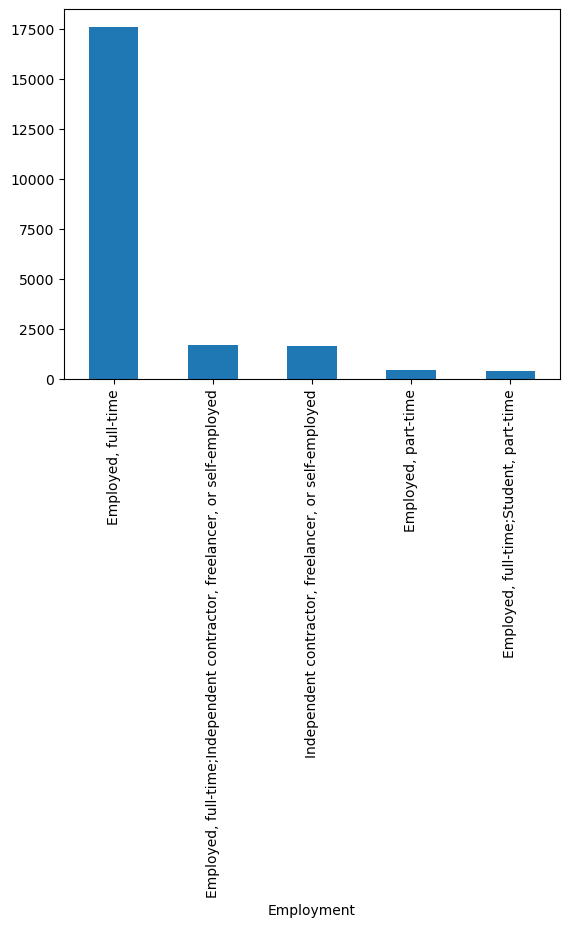

In [32]:
df["Employment"].value_counts().head().plot(kind="bar");

In [33]:
age_em = df.groupby(["Age", "RemoteWork"]).size().unstack().reset_index().melt(id_vars="Age", var_name="RemoteWork", value_name="count")

In [34]:
df["RemoteWork"].unique()

array(['Hybrid (some remote, some in-person)', 'Remote', 'In-person'],
      dtype=object)

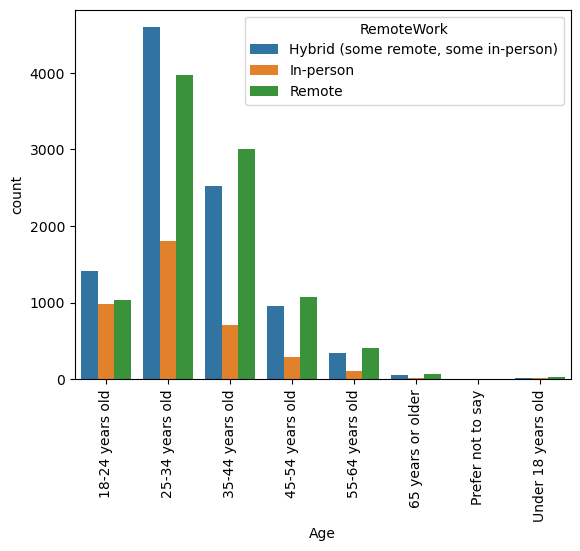

In [35]:
sns.barplot(data=age_em, x="Age", y="count", hue="RemoteWork")
plt.xticks(rotation=90);

In [36]:
pro_code = df.groupby(["YearsCodePro", "RemoteWork"]).size().unstack().reset_index().melt(id_vars="YearsCodePro", var_name="RemoteWork", value_name="count")

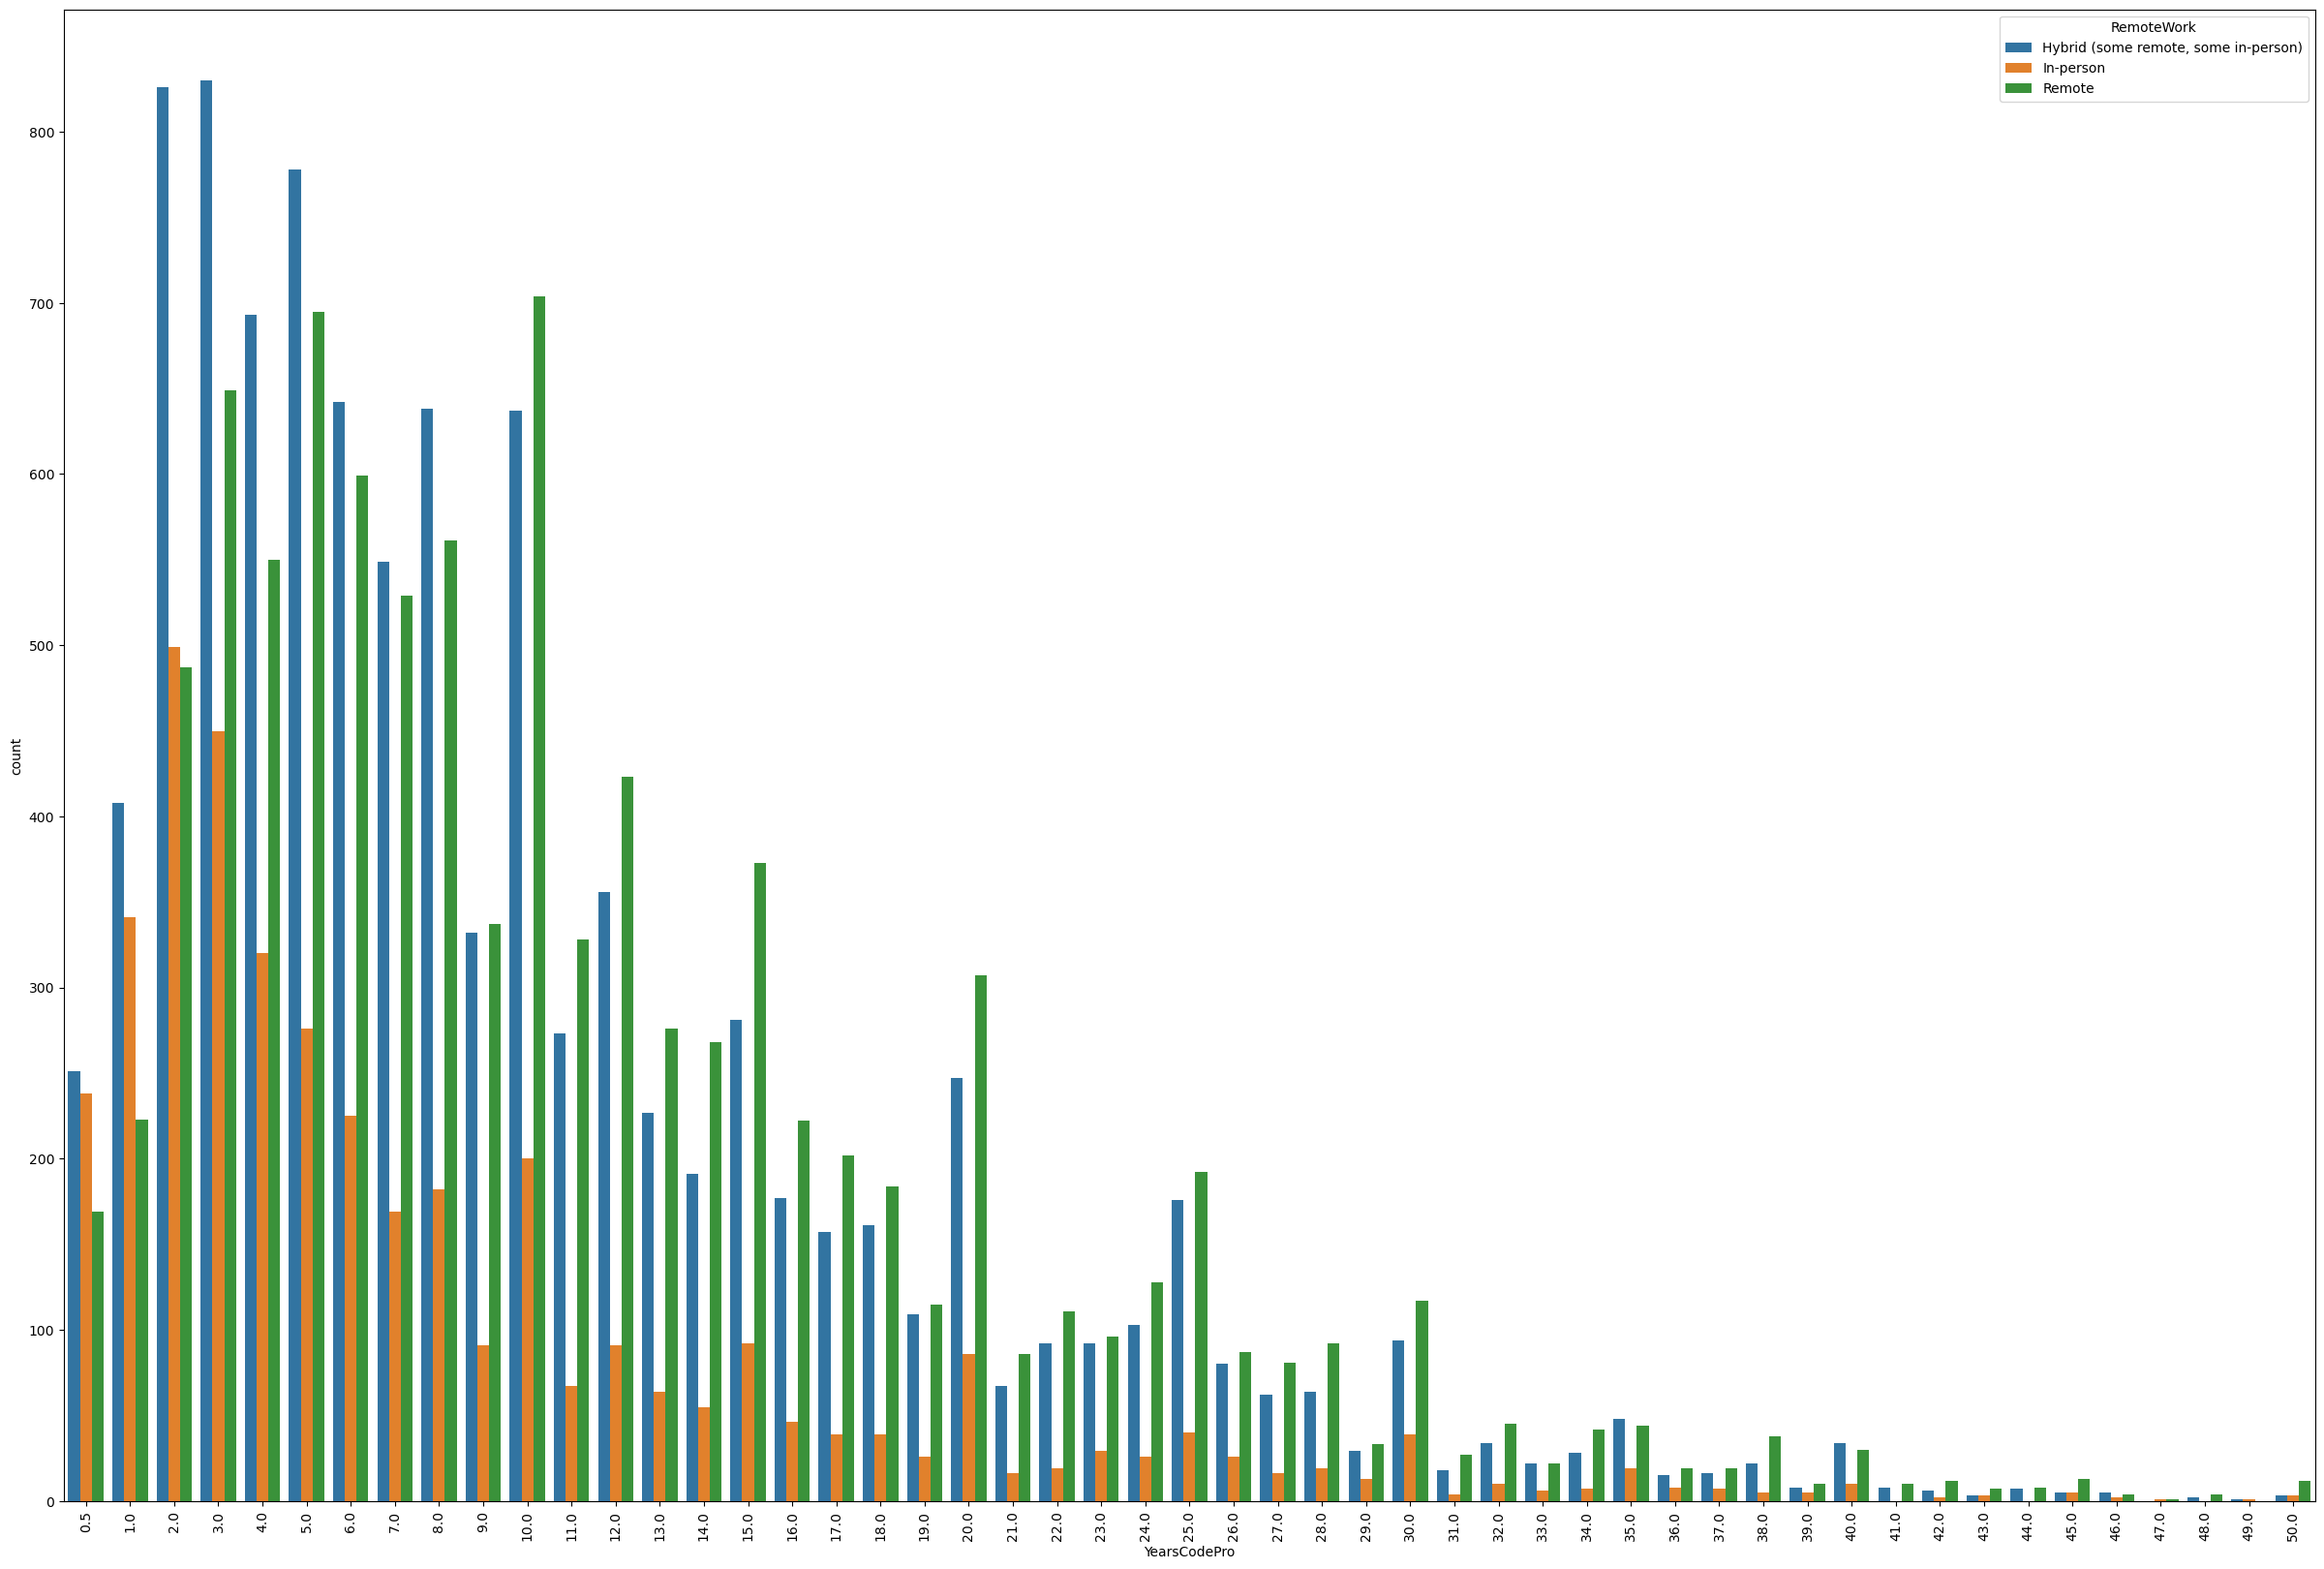

In [37]:
plt.figure(figsize = (30,20))
sns.barplot(data=pro_code, x="YearsCodePro", y="count", hue="RemoteWork")
plt.xticks(rotation=90);

In [38]:
co_rem = df.groupby(["Country", "RemoteWork"]).size().unstack().reset_index().melt(id_vars="Country", var_name="RemoteWork", value_name="count")

In [39]:
co_rem.dropna(inplace=True)
co_rem = co_rem.sort_values(by="count", ascending=False)
co_rem = co_rem[co_rem["count"] > 100]

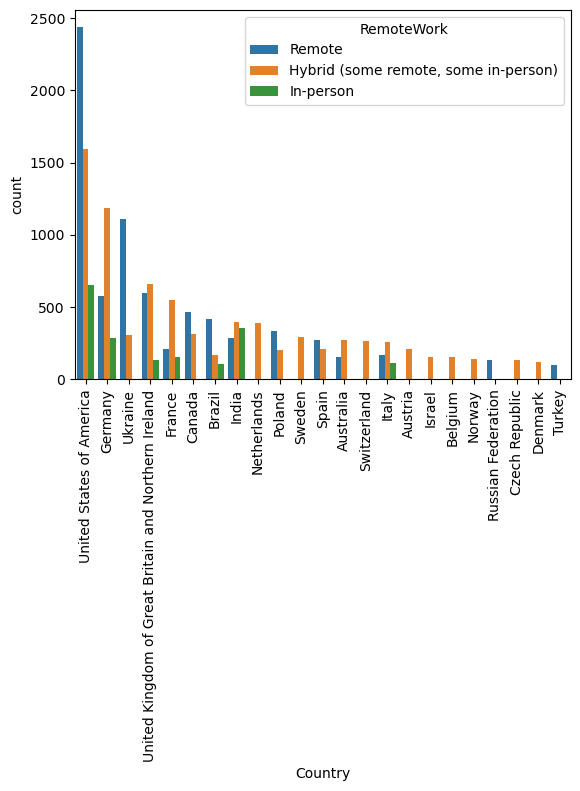

In [40]:
#plt.figure(figsize = (30,20))
sns.barplot(data=co_rem, x="Country", y="count", hue="RemoteWork")
plt.xticks(rotation=90);

In [41]:
country_salary = df.groupby("Country")["ConvertedCompYearly"].median().reset_index()
country_salary.columns = ["Country", "Average"]
cs = country_salary.sort_values(by="Average", ascending=False).head(20)

In [42]:
country_salary.head()

,Country,Average
0,Afghanistan,3438.0
1,Albania,35341.0
2,Algeria,7120.0
3,Andorra,123517.0
4,Angola,1754.0


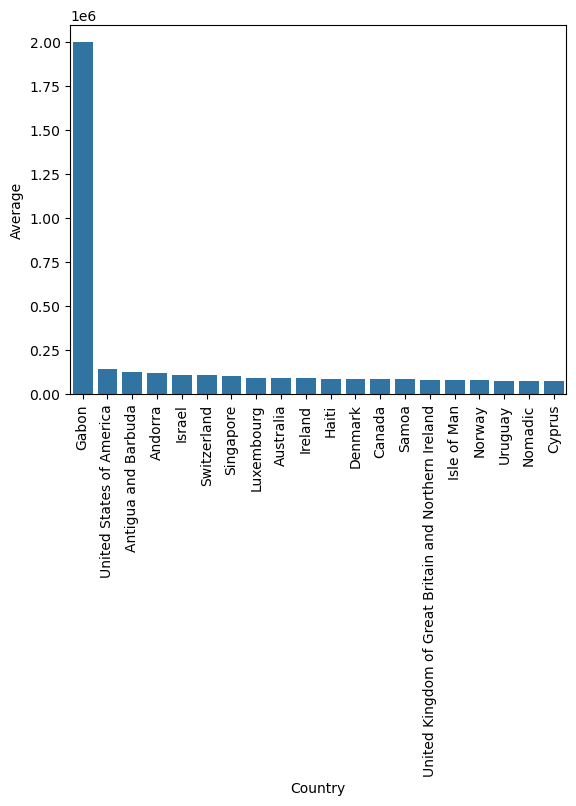

In [43]:
sns.barplot(data=cs, x="Country", y="Average")
plt.xticks(rotation=90);

In [44]:
df[df["Country"] == "Gabon"]["ConvertedCompYearly"]

ResponseId
2188    2000000.0
Name: ConvertedCompYearly, dtype: float64

In [68]:
y = np.log1p(df[df.columns[-1]])
X = df[df.columns[:len(df.columns)-1]]

In [69]:
num = X.select_dtypes(include=["float", "int"]).columns.tolist()
cat = X.select_dtypes(include=["object"]).columns.tolist()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [71]:
preprocess = ColumnTransformer(
    transformers =[
        ("num", StandardScaler(), num),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat)
    ]
)

In [72]:
p2 = make_pipeline(preprocess, LinearRegression())
p2.fit(X_train, y_train)
y_pred = p2.predict(X_test)

In [73]:
r2_score(y_test, y_pred)

0.4581719976652592

In [74]:
mean_absolute_error(y_test, y_pred)

0.599577865402525

In [75]:
np.sqrt(mean_squared_error(y_test, y_pred))

1.051123830182566

In [76]:
p3 = make_pipeline(preprocess, RandomForestRegressor())
p3.fit(X_train, y_train)
y_pred_lr = p3.predict(X_test)

In [77]:
r2_score(y_test, y_pred_lr)

0.3960754617421296

In [78]:
np.sqrt(mean_squared_error(y_test, y_pred_lr))

1.1097227694533576

In [79]:
mean_absolute_error(y_test, y_pred_lr)

0.6344552129999451

In [80]:
p4 = make_pipeline(preprocess, XGBRegressor())
p4.fit(X_train, y_train)
y_pred_xgb = p4.predict(X_test)

In [81]:
r2_score(y_test, y_pred_xgb)

0.4343321154880455

In [82]:
np.sqrt(mean_squared_error(y_test, y_pred_xgb))

1.0739991073017912

In [83]:
mean_absolute_error(y_test, y_pred_xgb)

0.6023763445729804